**Data Preprocessing for SVM Based Depression Prediction Model**

***1.Import Required Libraries***

In [694]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split


***2.Load the Dataset***

In [695]:
#Load the dataset
#file_path = os.path.join(os.getcwd(), "Data", "raw", "student_depression_dataset.csv")
#df = pd.read_csv(file_path)

raw_df=pd.read_csv("./Data/raw/student_depression_dataset.csv")

In [696]:
#Make a copy to avoid modifying original
df=raw_df.copy()
print(f"Original shape:{df.shape}")

Original shape:(27901, 18)


In [697]:
#Preview the data
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


***3. Standardize Column Names***

In [698]:
df.columns=[col.strip().lower().replace(" ", "_").replace("/", "_").replace("?", "").rstrip("_") for col in df.columns]

***4.Inspect the Dataset***

In [699]:
# Print basic info about the dataset
print(f"Information of the dataset \n -------------------------------------------\n")
df.info()

Information of the dataset 
 -------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   27901 non-null  int64  
 1   gender                               27901 non-null  object 
 2   age                                  27901 non-null  float64
 3   city                                 27901 non-null  object 
 4   profession                           27901 non-null  object 
 5   academic_pressure                    27901 non-null  float64
 6   work_pressure                        27901 non-null  float64
 7   cgpa                                 27901 non-null  float64
 8   study_satisfaction                   27901 non-null  float64
 9   job_satisfaction                     27901 non-null  float64
 10  sleep_duration      

In [700]:
#Summary Statistics for numerical columns
print(f"Summary Statistics: \n -------------------------------------------\n")
print(df.describe())

Summary Statistics: 
 -------------------------------------------

                  id           age  academic_pressure  work_pressure  \
count   27901.000000  27901.000000       27901.000000   27901.000000   
mean    70442.149421     25.822300           3.141214       0.000430   
std     40641.175216      4.905687           1.381465       0.043992   
min         2.000000     18.000000           0.000000       0.000000   
25%     35039.000000     21.000000           2.000000       0.000000   
50%     70684.000000     25.000000           3.000000       0.000000   
75%    105818.000000     30.000000           4.000000       0.000000   
max    140699.000000     59.000000           5.000000       5.000000   

               cgpa  study_satisfaction  job_satisfaction  work_study_hours  \
count  27901.000000        27901.000000      27901.000000      27901.000000   
mean       7.656104            2.943837          0.000681          7.156984   
std        1.470707            1.361148        

In [701]:
print(df.columns.tolist())


['id', 'gender', 'age', 'city', 'profession', 'academic_pressure', 'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction', 'sleep_duration', 'dietary_habits', 'degree', 'have_you_ever_had_suicidal_thoughts', 'work_study_hours', 'financial_stress', 'family_history_of_mental_illness', 'depression']


***5. Replace common invalid strings with NaN***

In [706]:
#Replace common invalid/missing string indicators with np.nan
invalid_strings = ['NA', 'N/A', 'null', 'others', '?', '', ' ']
df.replace(invalid_strings, np.nan, inplace=True)


***6. Convert specific columns to numeric***

In [708]:
#Convert some columns to numeric forcing errors to NaN
df['financial_stress'] = pd.to_numeric(df['financial_stress'], errors='coerce')
df['cgpa'] = pd.to_numeric(df['cgpa'], errors='coerce')


***7. Check whether there are missing values in the dataset***

In [709]:
#Check missing values
print("Missing values in each Column:\n")
print(df.isnull().sum())

Missing values in each Column:

gender                                 0
age                                    0
city                                   0
profession                             0
academic_pressure                      0
work_pressure                          0
cgpa                                   0
study_satisfaction                     0
job_satisfaction                       0
sleep_duration                         0
dietary_habits                         0
degree                                 0
have_you_ever_had_suicidal_thoughts    0
work_study_hours                       0
financial_stress                       3
family_history_of_mental_illness       0
depression                             0
dtype: int64


***5.Check whether there are duplicates in the dataset***

In [710]:
#Check for duplicate rows
print("Number of Duplicate Rows:/n")
print(df.duplicated().sum())

Number of Duplicate Rows:/n
0


***6.Drop Irrelevant Columns***

In [711]:
irrelevant_cols = ['id', 'city', 'work_pressure', 'job_satisfaction']
cols_to_drop = [col for col in irrelevant_cols if col in df.columns]
df.drop(columns=cols_to_drop, inplace=True)
print(f"Shape after dropping irrelevant columns: {df.shape}")


Shape after dropping irrelevant columns: (27901, 14)


***7.Identify Feature Types***

In [712]:
#Target Variable/column
target='depression'

#Feature columns(excluding target)
features=df.drop(columns=[target])

#Categorical Features
categorical_cols=features.select_dtypes(include='object').columns.tolist()

#Numerical Features
numerical_cols=features.select_dtypes(exclude='object').columns.tolist()

print("Categorical:",categorical_cols)
print("Numerical:",numerical_cols)

Categorical: ['gender', 'profession', 'sleep_duration', 'dietary_habits', 'degree', 'have_you_ever_had_suicidal_thoughts', 'family_history_of_mental_illness']
Numerical: ['age', 'academic_pressure', 'cgpa', 'study_satisfaction', 'work_study_hours', 'financial_stress']


***8. Exploratory Dta Analysis(EDA)***

*8.1 Target Variable Distribution*

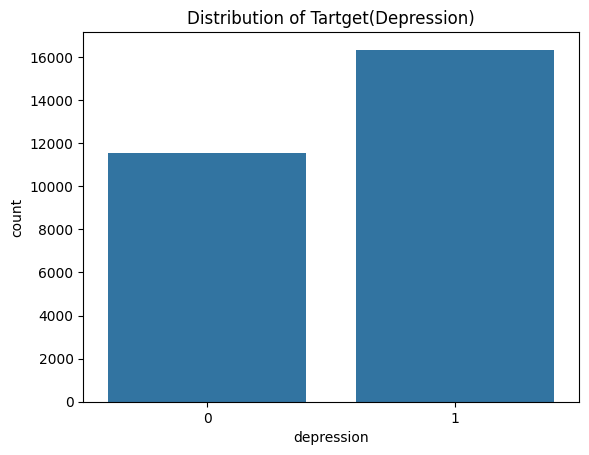

In [713]:
sns.countplot(x=df[target])
plt.title("Distribution of Tartget(Depression)")
plt.show()

*8.2 Distribution of Numerical Features*

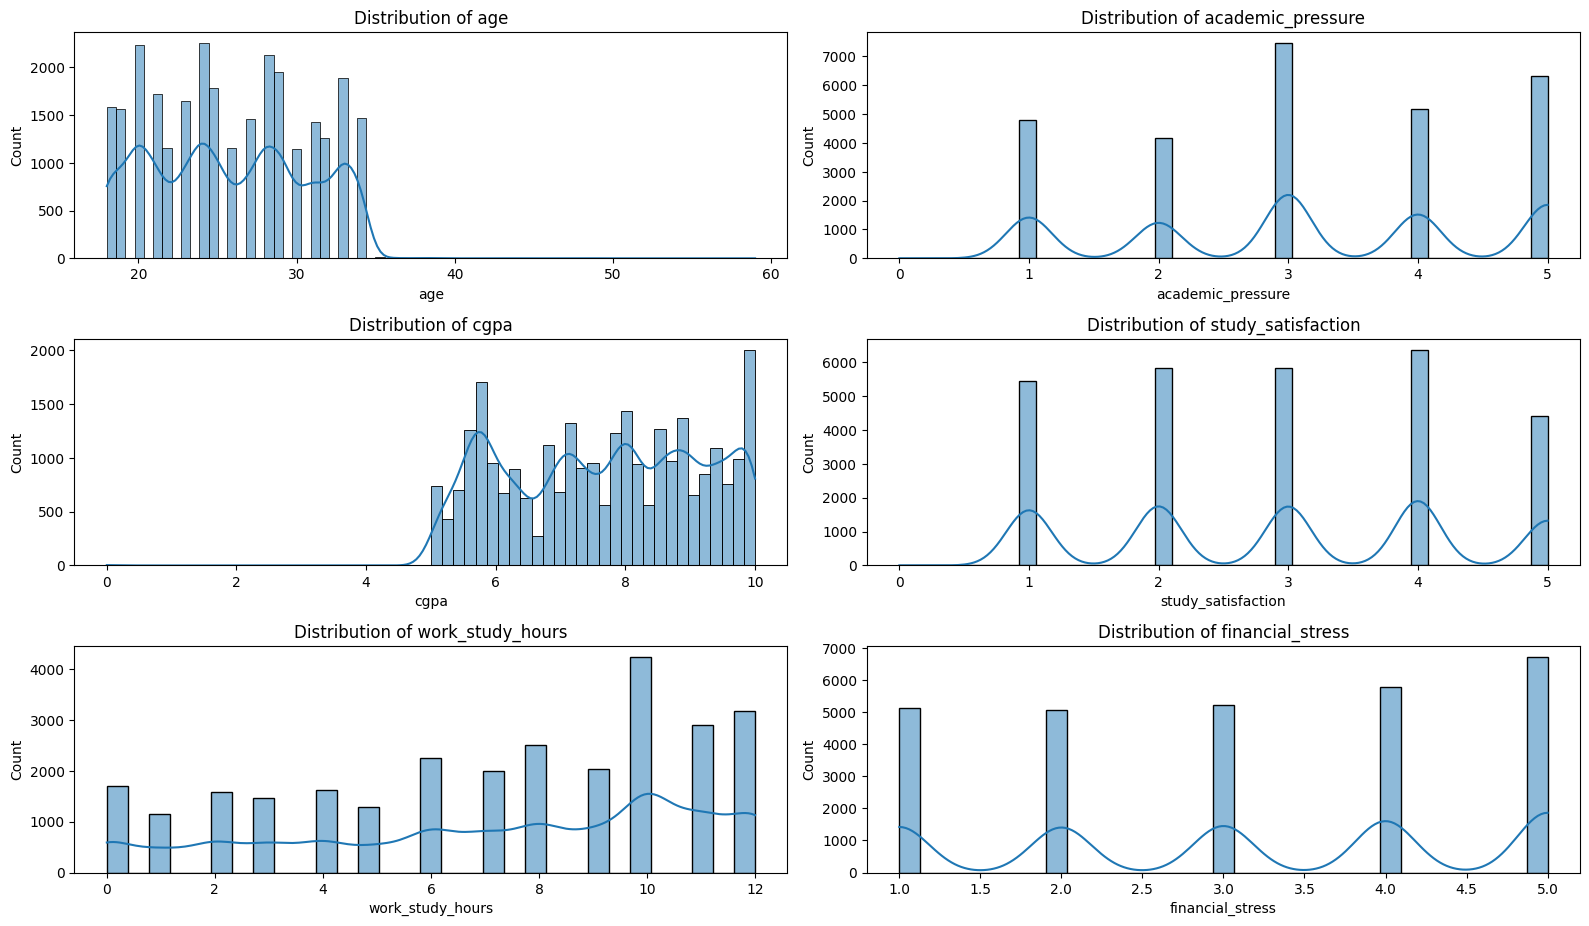

In [714]:
plt.figure(figsize=(16,12))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,2,i+1)
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()    


*8.3 Boxplots for Outlier Detection*

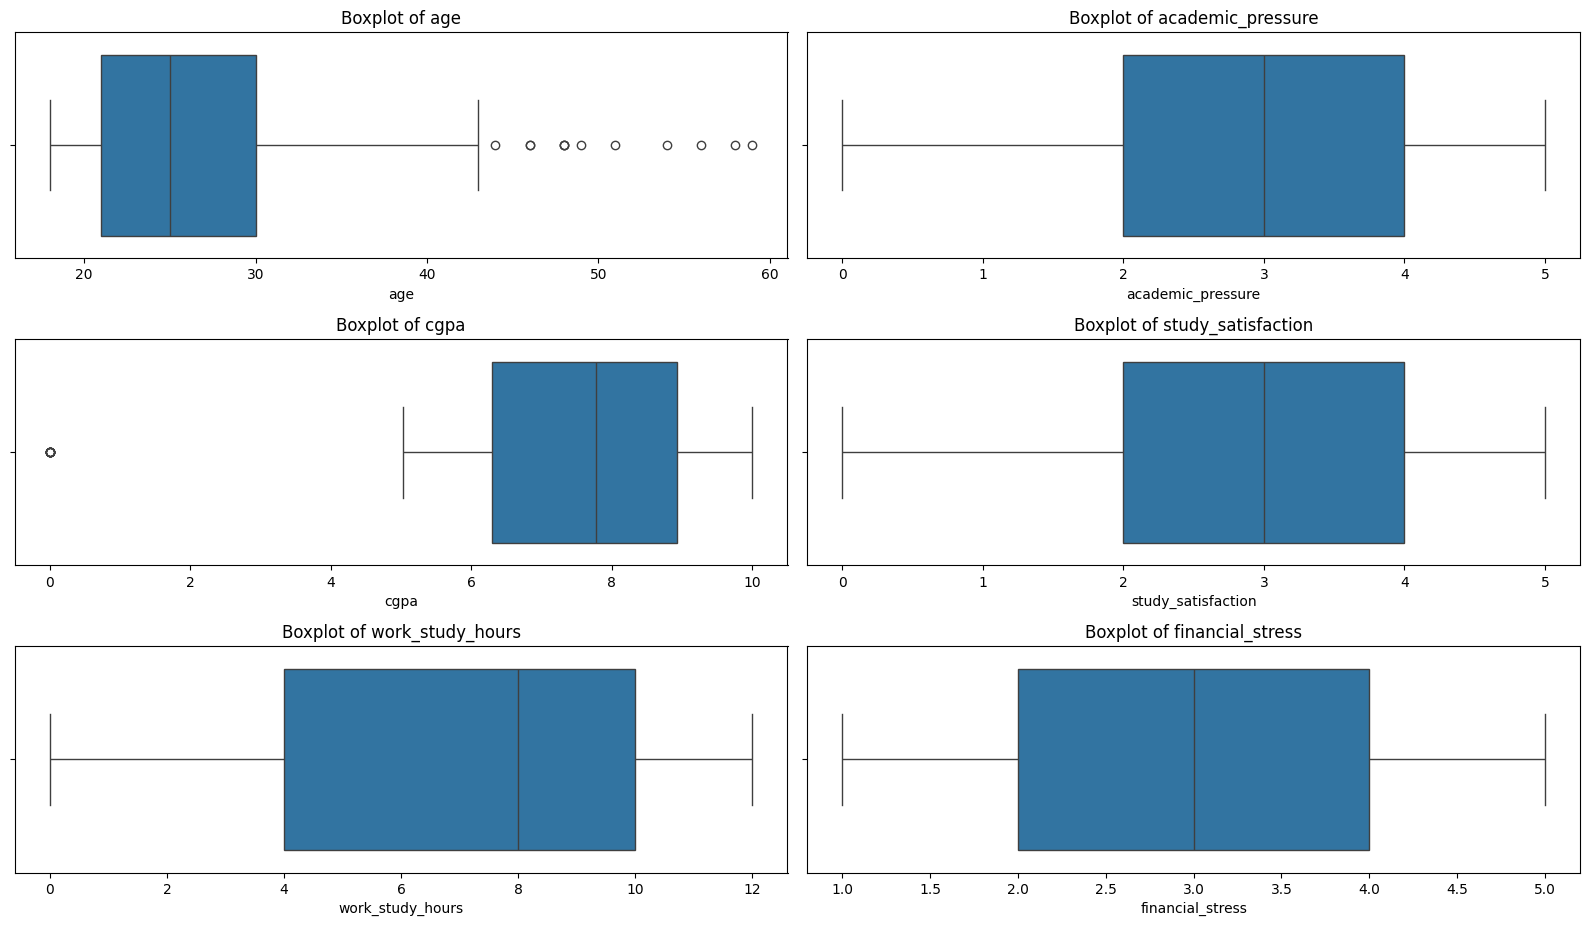

In [715]:
plt.figure(figsize=(16,12))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

*8.4 Correlation Heatmap(For Numerical Features)*

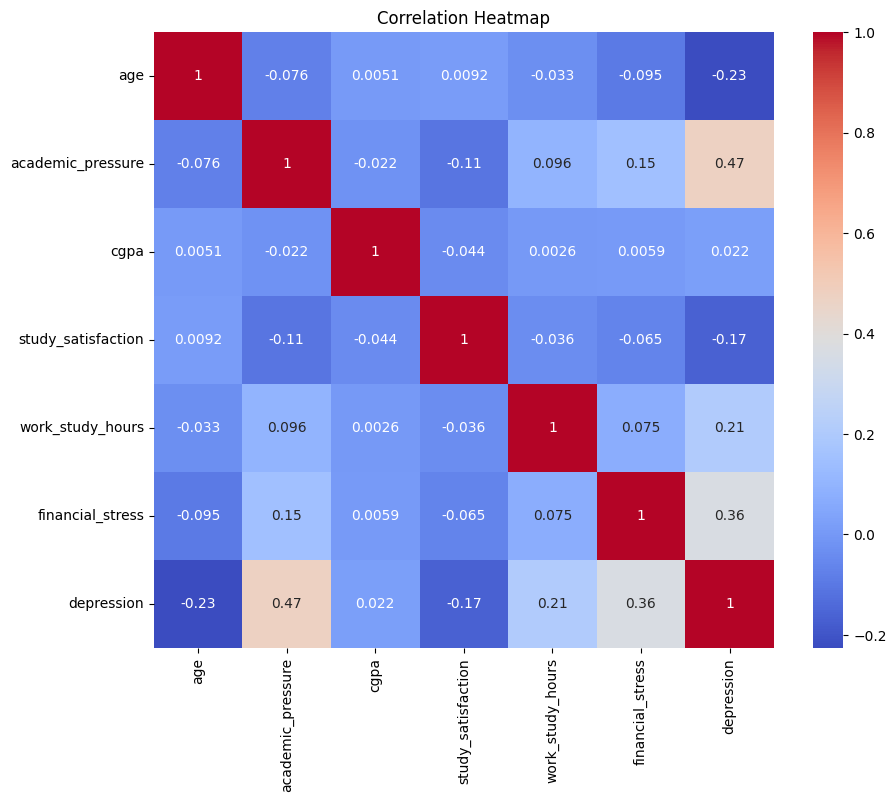

In [716]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols+[target]].corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

*8.5 Categorical Feature Counts*

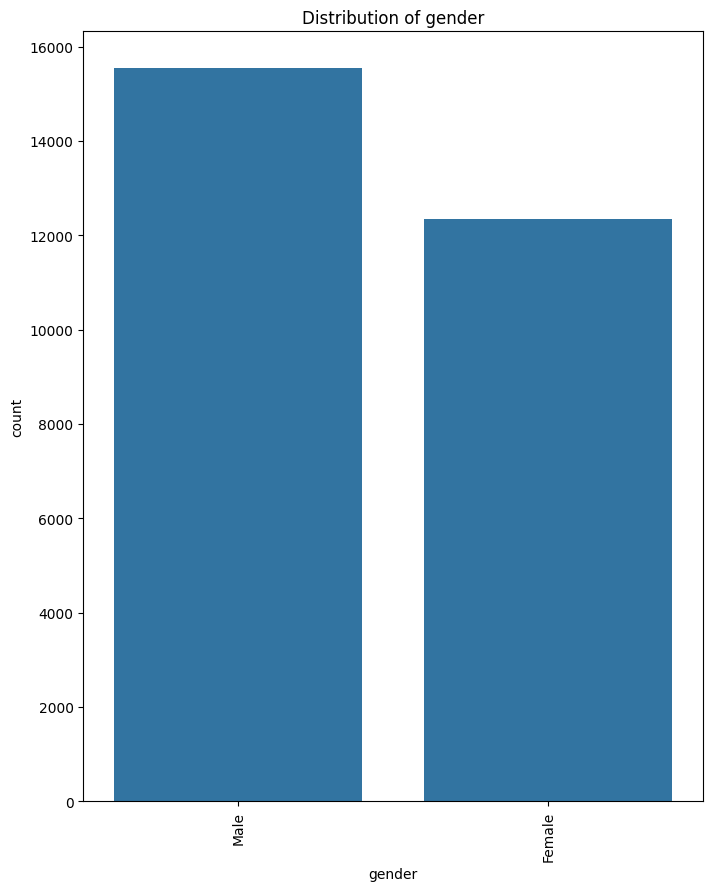

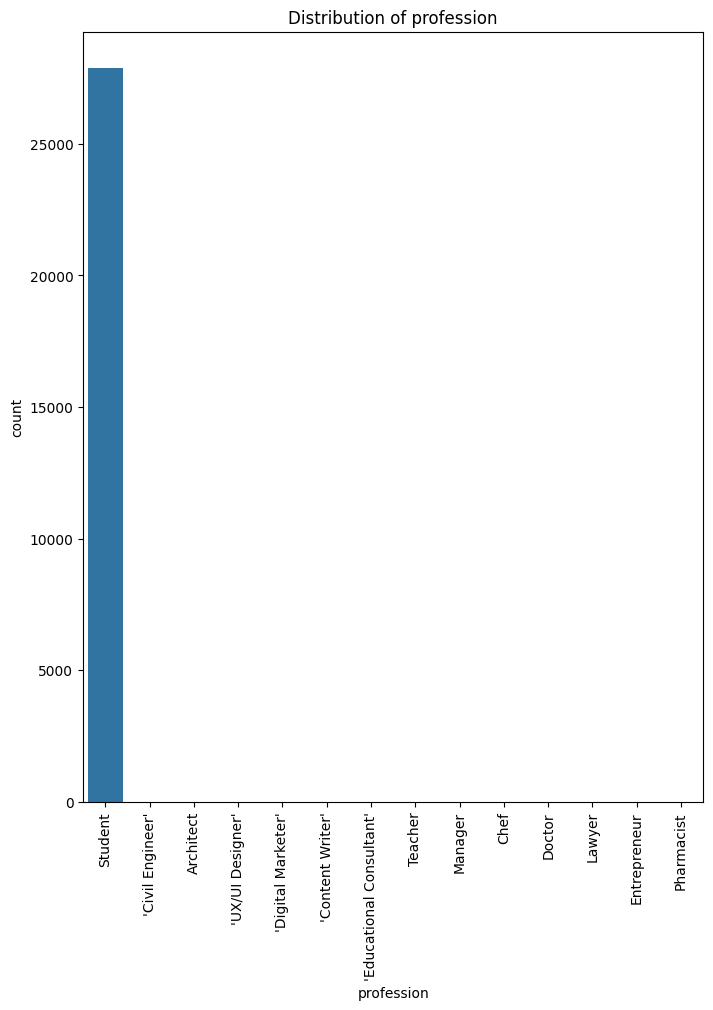

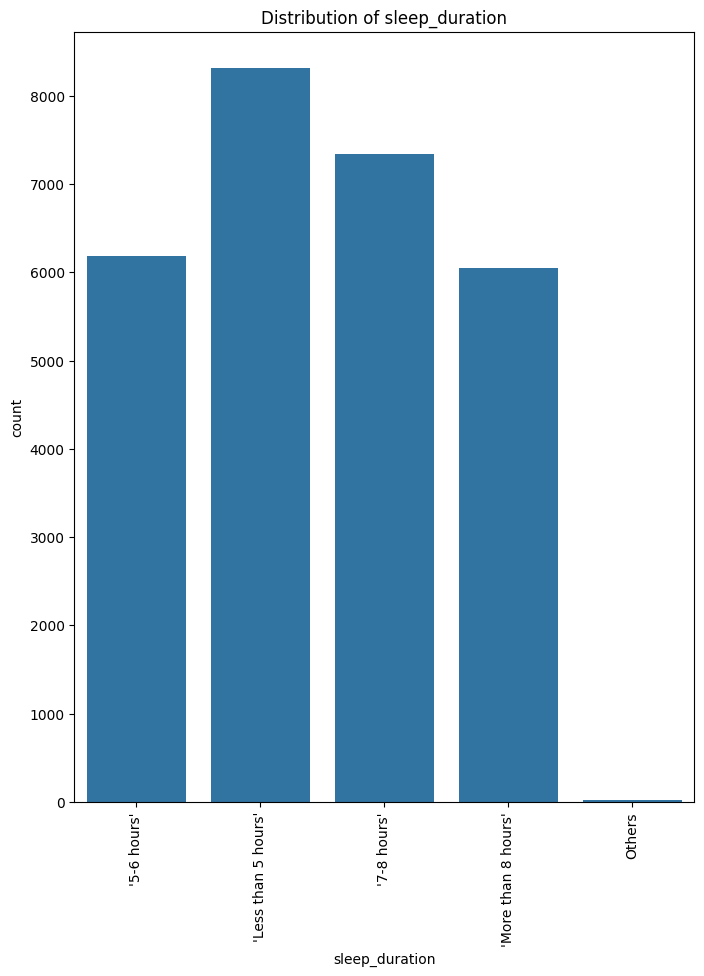

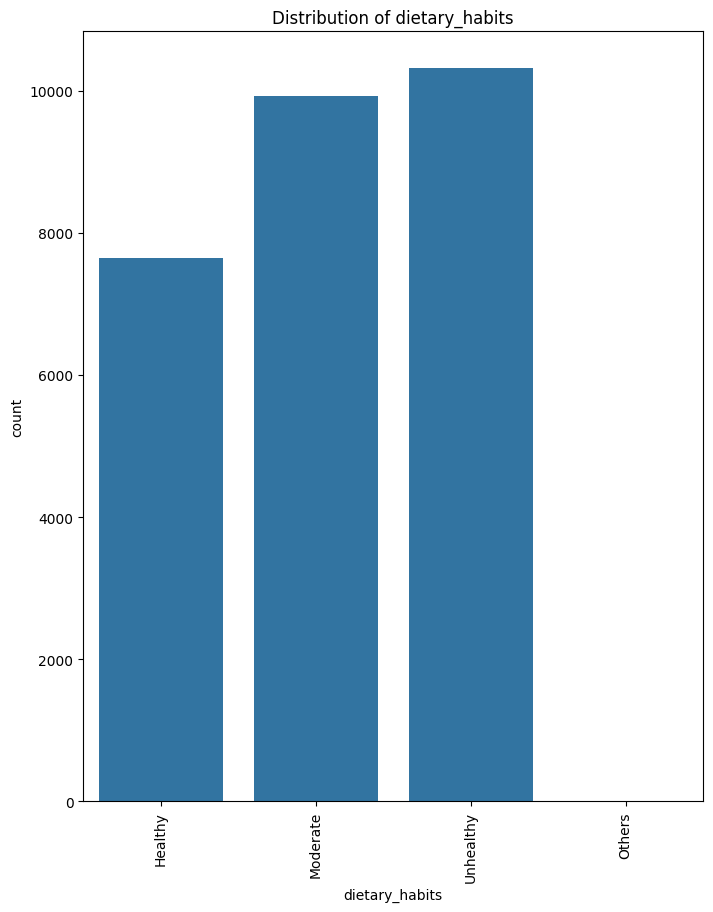

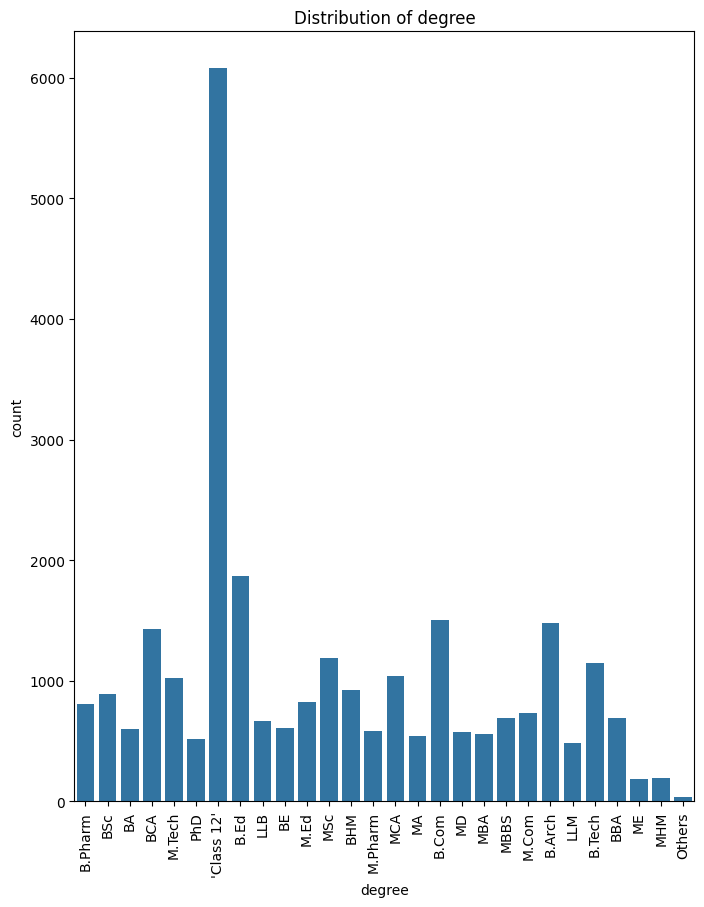

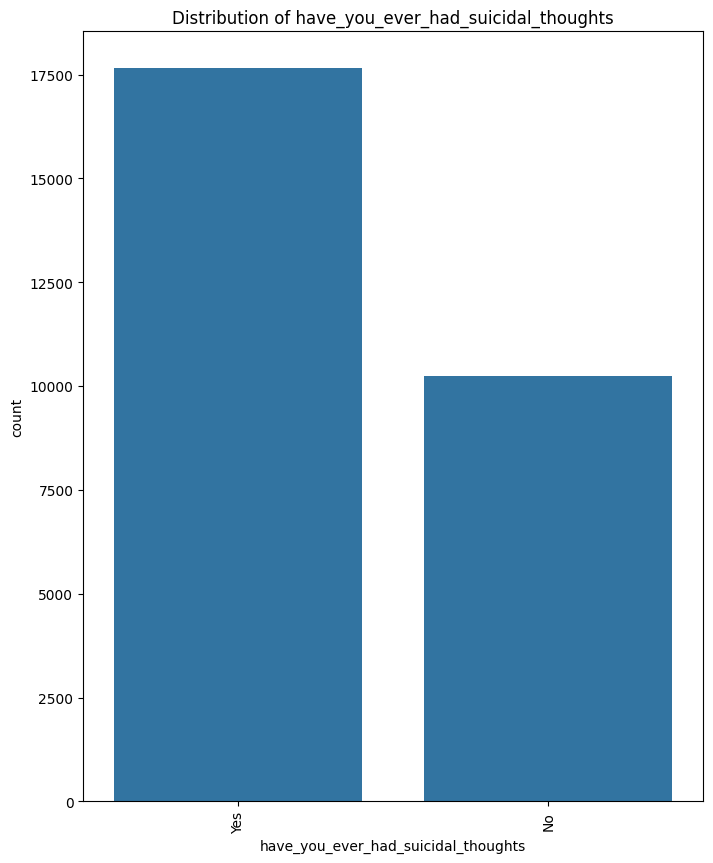

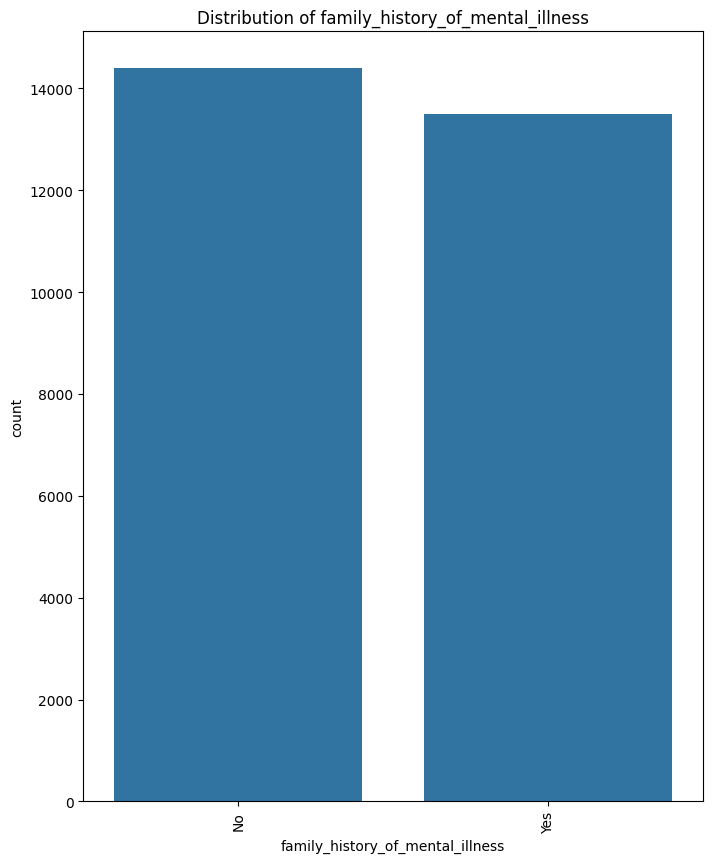

In [717]:
for col in categorical_cols:
    plt.figure(figsize=(8,10))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

***9.Encode Categorical Variables***

SVM only works with numerical data. So need to encode categorical data.

*9.1.Label Encode Binary Categorical Columns*

In [719]:
le = LabelEncoder()


#List of binary categorical columns
binary_cols = [
    'gender',
    'academic_pressure',
    'study_satisfaction',
    'dietary_habits',
    'have_you_ever_had_suicidal_thoughts',
    'financial_stress',
    'family_history_of_mental_illness'
]

#Apply Label Encoding
for col in binary_cols:
    df[col] =le.fit_transform(df[col])

*9.2.One-Hot encode nominal categorical Columns*

In [721]:
#Apply One-Hot Encoding to niminal(multi-categorical) columns
df=pd.get_dummies(df,columns=['profession','degree'],drop_first=True)

*9.3.Encode the Target Variable*

In [722]:
#Convert the target variable(Depression) to numeric
df['depression']=le.fit_transform(df['depression'])

***10.Convert Original Range columns to Numeric***

Columns like 'Sleep Duration' and 'Work/Study Hours' contain rages which are strings. So, we need to map them to numerical values.

In [724]:
# Convert 'Sleep Duration' and 'Work/Study Hours' to numeric
sleep_map={
    'less than 4 hours':3,
    '4-5 hours':4.5,
    '5-6 hours':5.5,
    '6-7 hours':6.5,
    '7-8 hours':7.5,
    'more than 8 hours':9
}

work_study_map={
    'less than 4 hours':3,
    '4-6 hours':5,
    '6-8 hours':7,
    'more than 8 hours':9
}

#Apply the mappings
df['sleep_duration']=df['sleep_duration'].map(sleep_map)
df['work_study_hours']=df['work_study_hours'].map(work_study_map)


***11.Feature Scaling***

In [727]:
# Separate features and target
X=df.drop('depression',axis=1)
y=df['depression']

# Scale the features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


/usr/local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [728]:
# Convert to DataFrame to see the scaled values with column names
X_scaled_df=pd.DataFrame(X_scaled, columns=X.columns)

# Display first 5 rows
X_scaled_df.head()

,gender,age,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,have_you_ever_had_suicidal_thoughts,work_study_hours,financial_stress,...,degree_MA,degree_MBA,degree_MBBS,degree_MCA,degree_MD,degree_ME,degree_MHM,degree_MSc,degree_Others,degree_PhD
0,0.891416,1.463165,1.345543,0.893393,-0.693425,NaN,-1.182363,0.761745,NaN,-1.488765,...,-0.141015,-0.143376,-0.159949,-0.197161,-0.144673,-0.0817,-0.083023,-0.211071,-0.03544,-0.138079
1,-1.121811,-0.371474,-0.826104,-1.194076,1.510636,NaN,-0.375705,-1.312775,NaN,-0.793137,...,-0.141015,-0.143376,-0.159949,-0.197161,-0.144673,-0.0817,-0.083023,-0.211071,-0.03544,-0.138079
2,0.891416,1.055467,-0.102222,-0.425724,1.510636,NaN,-1.182363,-1.312775,NaN,-1.488765,...,-0.141015,-0.143376,-0.159949,-0.197161,-0.144673,-0.0817,-0.083023,-0.211071,-0.03544,-0.138079
3,-1.121811,0.443921,-0.102222,-1.404862,-0.693425,NaN,-0.375705,0.761745,NaN,1.293747,...,-0.141015,-0.143376,-0.159949,-0.197161,-0.144673,-0.0817,-0.083023,-0.211071,-0.03544,-0.138079
4,-1.121811,-0.167625,0.621660,0.322229,0.041262,NaN,-0.375705,0.761745,NaN,-1.488765,...,-0.141015,-0.143376,-0.159949,-0.197161,-0.144673,-0.0817,-0.083023,-0.211071,-0.03544,-0.138079


***12.Split Data into Train and Test Sets**

In [729]:
X_train,X_test,y_train,y_test=train_test_split(
    X_scaled,y,test_size=0.2,random_state=42,stratify=y
)

# Show shapes
print("Training set shape:",X_train.shape)
print("Testing set shape:",X_test.shape)

Training set shape: (22320, 51)
Testing set shape: (5581, 51)
